In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay


In [3]:
df = pd.read_csv('hotel_booking.csv')

In [4]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


Business Understanding

Mô tả bài toán: xây dựng một mô hình dự đoán để xác định xem liệu đặt phòng khách sạn có bị hủy hay không, điều này rất quan trọng đối với các khách sạn vì việc hủy ảnh hưởng đến doanh thu và kế hoạch hoạt động. Tập dữ liệu chứa nhiều tính năng liên quan đến đặt chỗ, chẳng hạn như thời gian thực hiện, loại tiền gửi và các yêu cầu đặc biệt, điều này làm tăng thêm độ phức tạp của mô hình. Thách thức nằm ở các bước tiền xử lý dữ liệu, bao gồm lựa chọn tính năng và kỹ thuật, xử lý các giá trị bị thiếu và nhiễu trong dữ liệu. Ngoài ra, chúng tôi sẽ đào tạo các mô hình khác nhau, đánh giá hiệu suất của chúng bằng cách sử dụng số liệu phù hợp và diễn giải mô hình bằng cách phân tích các tính năng quan trọng nhất trong bối cảnh hủy đặt phòng khách sạn.

Mô tả dữ liệu:
DATASET DESCRIPTION

hotel: Type of hotel (Resort Hotel or City Hotel)

is_canceled: Whether the booking was canceled (0: No, 1: Yes)

lead_time: Number of days between the booking date and the arrival date

arrival_date_year: Year of the arrival date

arrival_date_month: Month of the arrival date

arrival_date_week_number: Week number of the arrival date

arrival_date_day_of_month: Day of the month of the arrival date

stays_in_weekend_nights: Number of weekend nights stayed

stays_in_week_nights: Number of week nights

adults: Number of

children: Number of

babies: Number of

meal: Type of meal

country: Country of origin

market_segment: Market segment

distribution_channel: Distribution channel

is_repeated_guest: Whether the guest is a repeated guest (0: No, 1: Yes)

previous_cancellations: Number of previous cancellations

previous_bookings_not_canceled: Number of previous bookings not canceled

reserved_room_type: Reserved room type

assigned_room_type: Assigned room type

booking_changes: Number of changes made to the booking

deposit_type: Type of deposit

agent: Agent ID

company: Company ID

days_in_waiting_list: Number of days on the waiting list

customer_type: Type of customer

adr: Average daily rate

required_car_parking_spaces: Number of required car parking spaces

total_of_special_requests: Total number of special requests

reservation_status: Reservation status

reservation_status_date: Date of the reservation status

name: Customer name

email: Customer email

phone-number: Customer phone number

credit_card: Credit card number


data understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape

(119390, 36)

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#Handle Missing Values
# missing percent
def missing_percent (df):
    nan_percent = (df.isnull().sum()/len(df))*100
    nan_percent = nan_percent[nan_percent>0].sort_values()
    return nan_percent

missing_percent (df)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

Trong cột company, tỷ lệ phần trăm giá trị bị thiếu là hơn 90%, vì vậy chúng tôi loại bỏ các cột của công ty

Trong cột children và cột agent, tỷ lệ phần trăm giá trị bị thiếu lớn hơn 20%, vì vậy hãy điền chúng bằng KNNImputer

Thay thế giá trị null trong cột country bằng giá trị thường xuyên nhất

In [9]:
df = df.drop(columns = 'company', axis = 1)

In [10]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [11]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=5)
imputed = knn_imputer.fit_transform(df[['children','agent']].values)
df[['children','agent']] = imputed

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103893,0.398557,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Numerical Variables:

-lead_time: The average time between booking and arrival is approximately 104 days, ranging from 0 to 737 days.

-arrival_date_week_number: The average week number of the year for arrival is approximately 27.17, ranging from 1 to 53.

-arrival_date_day_of_month: The average day of the month of arrival is approximately 15.80, ranging from 1 to 31.

-stays_in_weekend_nights: On average, guests stay for around 0.93 weekend nights, with some guests staying for as long as 19 weekend nights.

-stays_in_week_nights: On average, guests stay for about 2.5 week nights, with stays ranging from 0 to 50 week nights.

-adults: The average number of adults per booking is approximately 1.86, with a range from 0 to 55 adults.

-hildren: On average, there are about 0.1 children per booking, with a maximum of 10 children in some bookings.

-babies: The average number of babies per booking is very low, approximately 0.008, with a maximum of 10 babies in some bookings.

-previous_cancellations: On average, guests have canceled about 0.09 times in the past, with some guests having as many as 26 previous cancellations.

-previous_bookings_not_canceled: On average, guests have not canceled about 0.14 bookings in the past, with some guests having as many as 72 previous bookings that they didn't cancel.

-booking_changes: Bookings are changed on average about 0.22 times, with some bookings being changed up to 21 times.

-days_in_waiting_list: The average time a booking spends on the waiting list is approximately 2.32 days, with some bookings waiting for as long as 391 days.

-adr: The Average Daily Rate is about 101.83, with rates ranging from -6.38 (which might indicate errors or special cases) to 5400.

-required_car_parking_spaces: On average, guests require about 0.06 parking spaces, with some bookings requiring up to 8 spaces.

-total_of_special_requests: On average, guests make about 0.57 special requests, with some making up to 5 requests.

Noisy Data Features:

-adr: The Average Daily Rate (ADR) represents the average amount a guest pays for a room per day. In this dataset, ADR has a minimum value of -6.38. A negative rate doesn't make sense, indicating potential errors or special cases.

-adults: The minimum value is 0, which implies bookings without any adults. This could be a data entry error unless there are legitimate cases where only children or babies book a room.

-hildren and babies: Both have a maximum value of 10, which seems unusually high for a single booking. This could be a potential outlier or data entry error, but it would require more context or domain knowledge to say definitively.



In [14]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,177,PRT,49078
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


-hotel: There are two types of hotels, with "City Hotel" being the most frequent category, occurring 79,330 times out of 119,390 entries.

-is_canceled: Two unique values (0 for not canceled and 1 for canceled) are present. The most common value is "0" (not canceled), occurring 75,166 times.
arrival_date_year: There are three unique years present, with 2016 being the most frequent year of arrival, observed 56,707 times.

-arrival_date_month: There are 12 unique months. August is the most frequent month of arrival, observed 13,877 times.

-meal: Five unique types of meals are booked. The most common type is "BB", observed 92,310 times.

-country: 178 unique countries of origin are present. The most frequent country is "PRT" (Portugal), observed 48,590 times.

-market_segment: Eight unique market segments are present. The most common segment is "Online TA", observed 56,477 times.

-distribution_channel: Five unique booking distribution channels are present, with "TA/TO" being the most frequent, observed 97,870 times.

-is_repeated_guest: Two unique values (0 for not repeated and 1 for repeated) are present. The most frequent value is "0" (not repeated), observed in the majority of entries.

-reserved_room_type and assigned_room_type: Various room types are present, with some types being more frequent than others.

-deposit_type: Three unique types of deposits are made. The most common type is "No Deposit", observed 104,641 times.

-agent: There are 334 unique agents, with '9.0' being the most frequent, occurring 31,961 times.

-company: There are 353 unique companies, but 'nan' (missing values) is the most frequent, occurring 112,593 times. This indicates that the 'company' variable has a high percentage of missing values.

-customer_type: Four unique customer types are present. The most frequent type is "Transient", observed 89,613 times.

-reservation_status: Three unique reservation statuses are present. The most common status is "Check-Out", observed 75,166 times.

-reservation_status_date: There are 926 unique values, with '2015-10-21' being the most frequent, occurring 1,461 times.

-name: There are 81,503 unique names, with 'Michael Johnson' being the most frequent, occurring 48 times.

-email: There are 115,889 unique email addresses, with 'Michael.C@gmail.com' being the most frequent, occurring 6 times.

-phone-number: There are 119,390 unique phone numbers, indicating that almost every guest has a unique phone number.

-credit_card: There are 9,000 unique credit card numbers, with '**4923' being the most frequent, occurring 28 times.

EDA

0    75166
1    44224
Name: is_canceled, dtype: int64

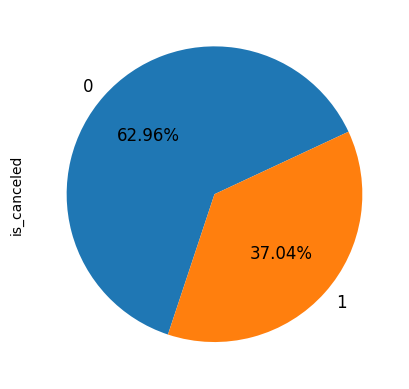

In [15]:
df['is_canceled'].value_counts().plot.pie(autopct='%1.2f%%', fontsize=12, startangle=25)
df['is_canceled'].value_counts()

tỉ lệ hủy phòng là 42,6%, tương đương 44209 khách hàng

<Axes: xlabel='is_canceled', ylabel='count'>

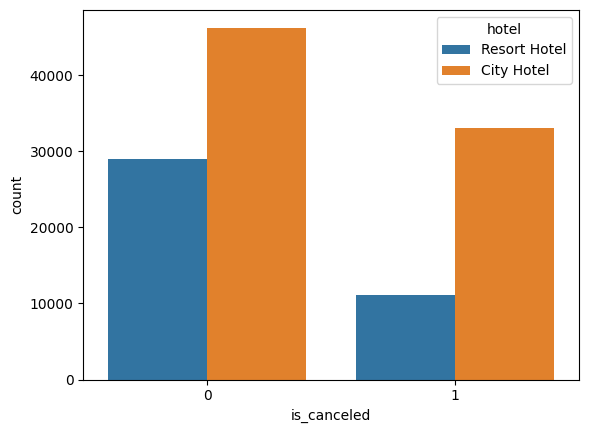

In [16]:
sns.countplot(data = df, x= 'is_canceled', hue = 'hotel')

tỷ lệ hủy phòng của city-hotel cao hơn resort-hotel

In [17]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [18]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

Hầu hết khách đến từ Bồ Đào Nha và các nước khác ở Châu Âu.

giải pháp: tập trung marketing và đưa ra các khuyến mại tại Bồ Đào Nha và các nước ở châu âu

In [19]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [20]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [21]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [22]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [23]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

In [24]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [25]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [26]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

giá ở resort_hotel cao hơn nhiều vào mùa hè và giá city_hotel ít biến động hơn và đắt nhất vào mùa Xuân Thu

In [27]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [28]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [29]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [30]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [31]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

city-hotel có nhiều khách hơn vào mùa xuân và mùa thu, khi giá cũng cao nhất, vào tháng 7 và tháng 8 lượng khách ít hơn, mặc dù giá thấp hơn. Lượng khách đến nghỉ tại resort-hotel giảm nhẹ từ tháng 6 đến tháng 9, đây cũng là thời điểm giá cao nhất. Cả hai khách sạn đều có ít khách nhất vào mùa đông

In [32]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [33]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


In [34]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


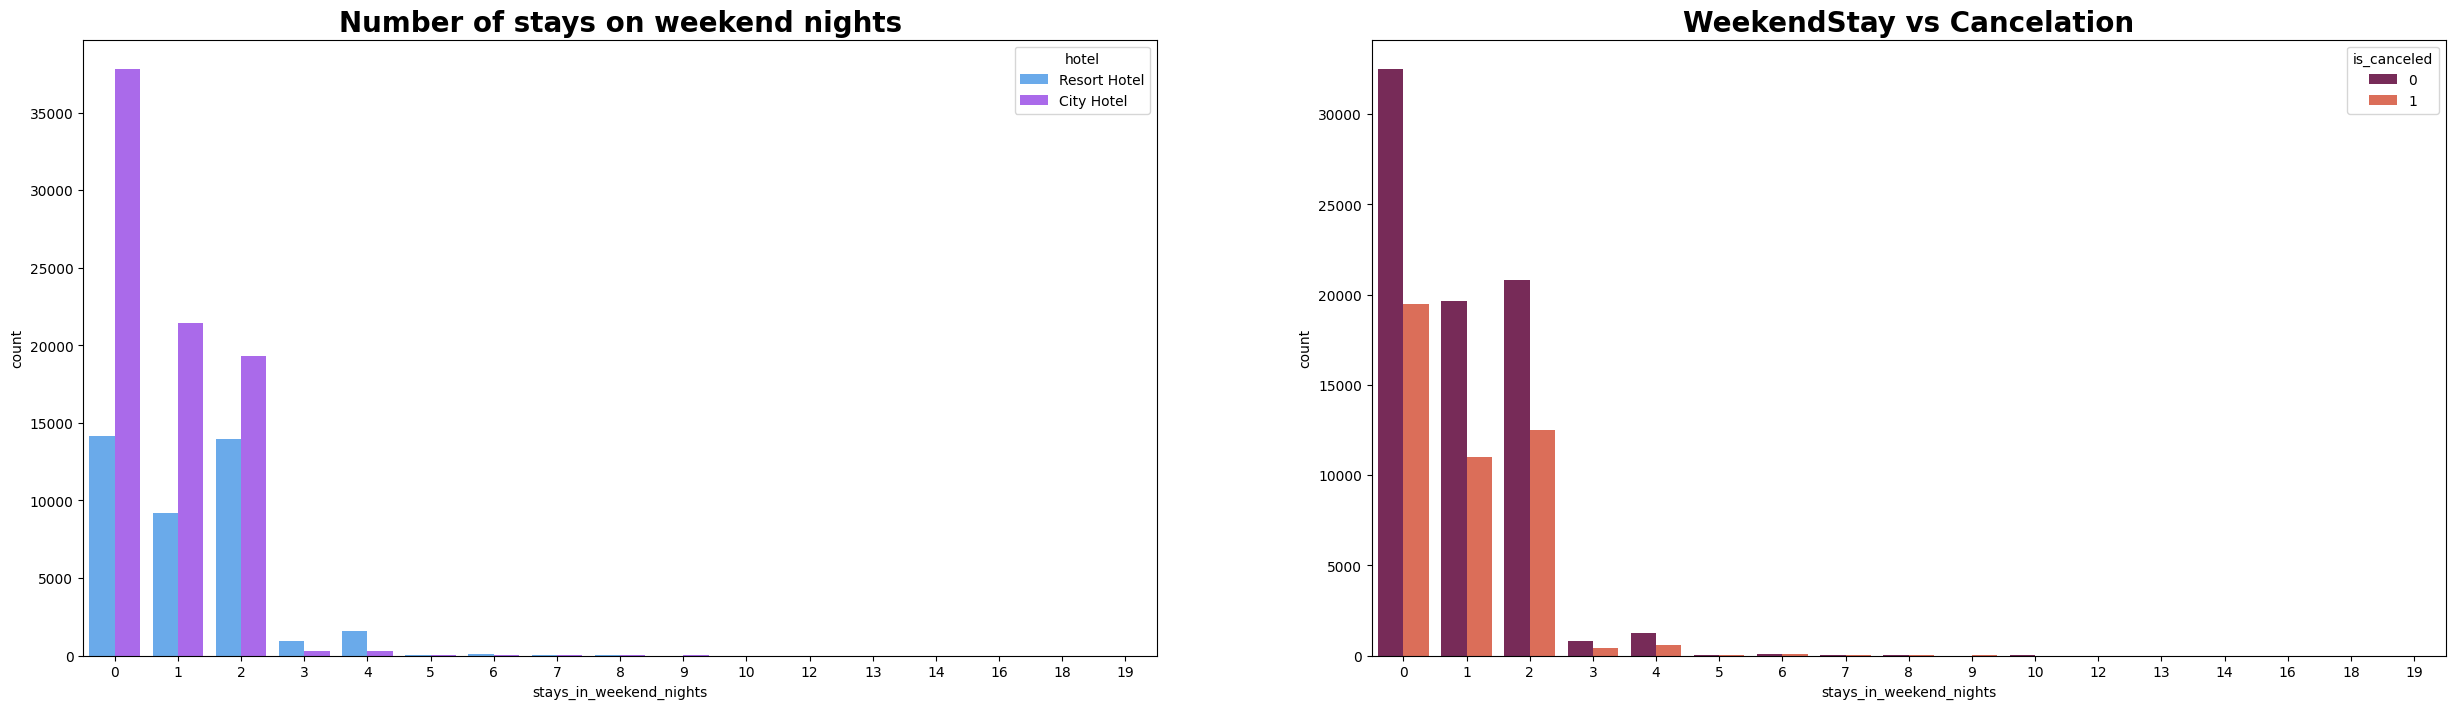

In [35]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

Trong biểu đồ đầu tiên, chúng ta có thể thấy hầu hết các đêm cuối tuần đều được đặt ở Khách sạn City

Biểu đồ thứ hai cho thấy hầu hết các đêm cuối tuần đã đặt đều không bị hủy

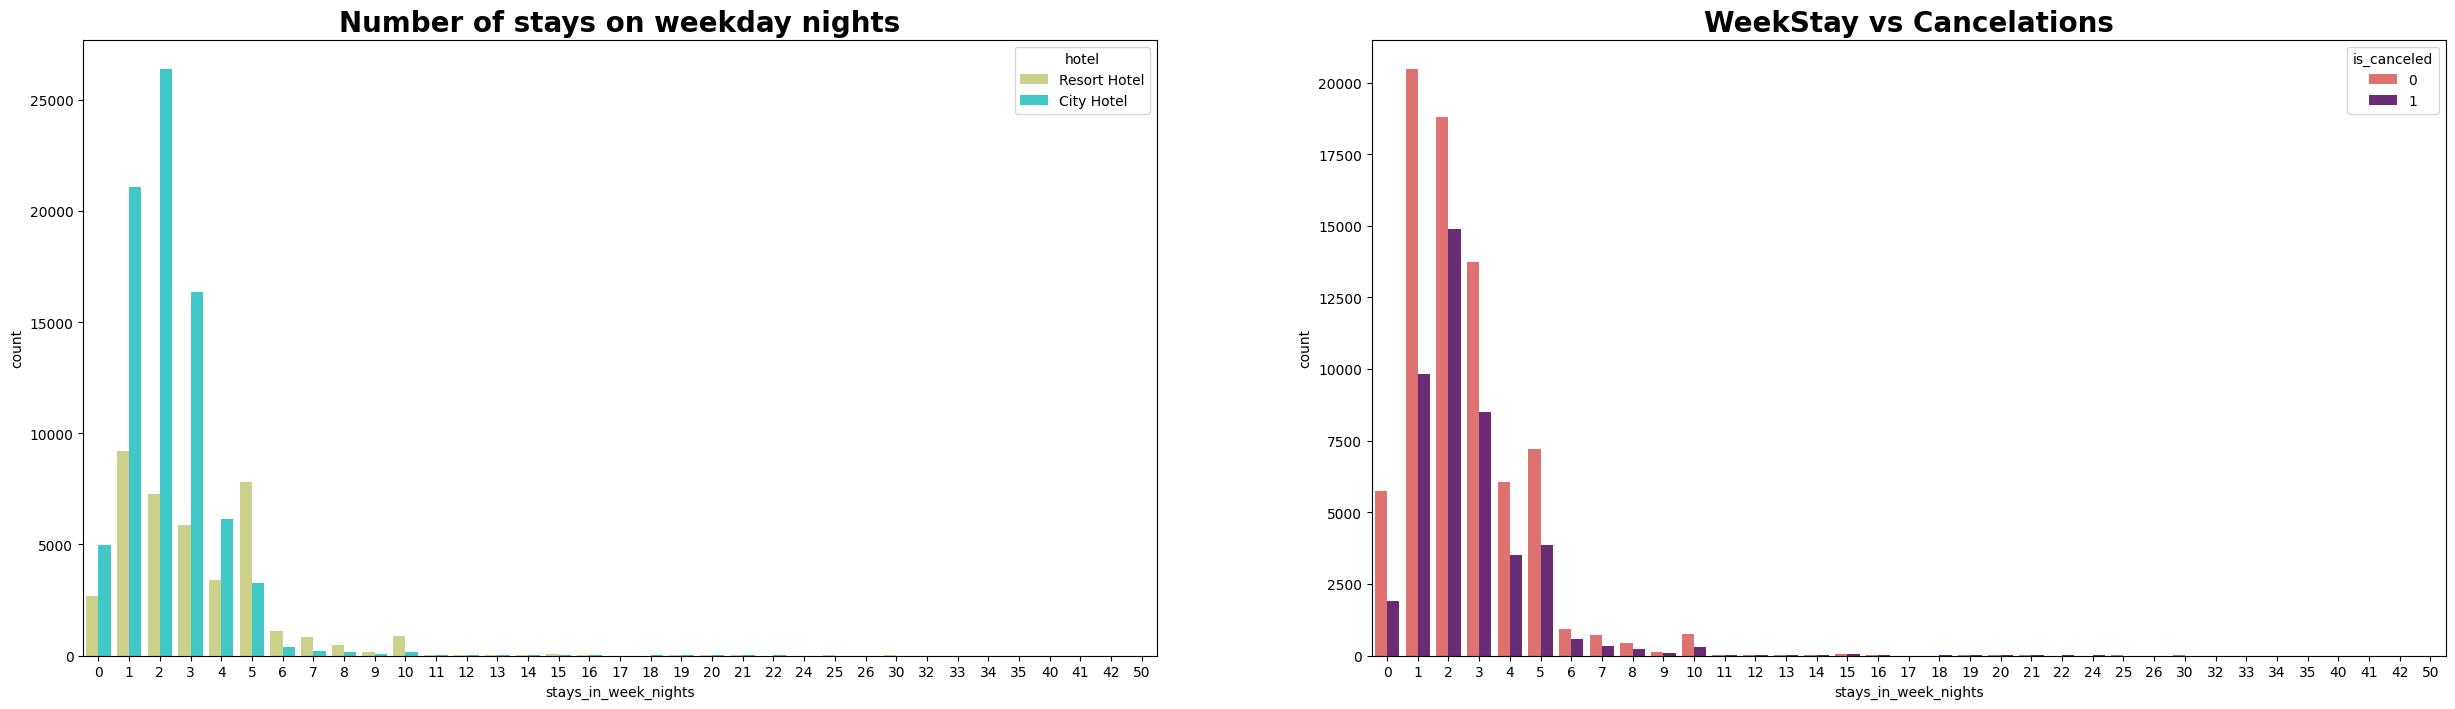

In [36]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_week_nights', hue='is_canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

số đêm nghỉ trong tuần ở khách sạn City nhiều hơn

Số lần hủy được ghi nhận ít hơn

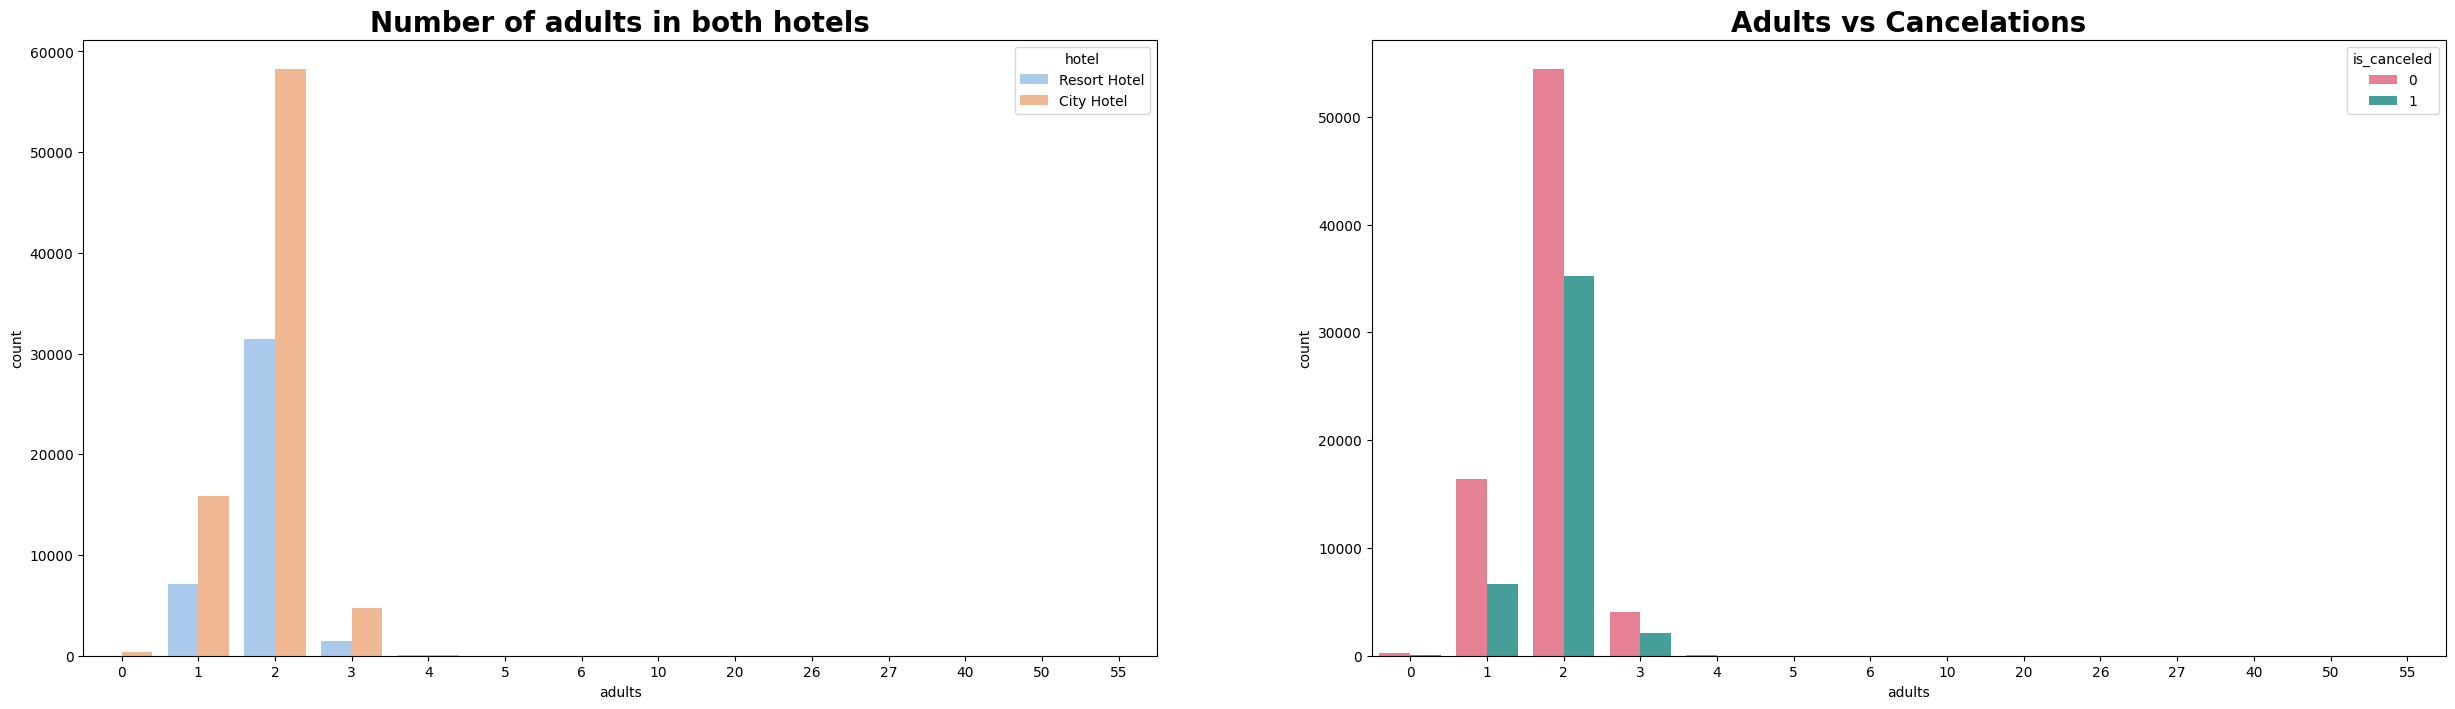

In [37]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='adults',hue='hotel', data=df, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'adults', hue='is_canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

Số lượng người lớn là 2 người nhiều hơn và ưa thích khách sạn ở thành phố hơn là khách sạn nghỉ dưỡng, trên thực tế, hơn một nửa số du khách thậm chí đã hủy đặt phòng

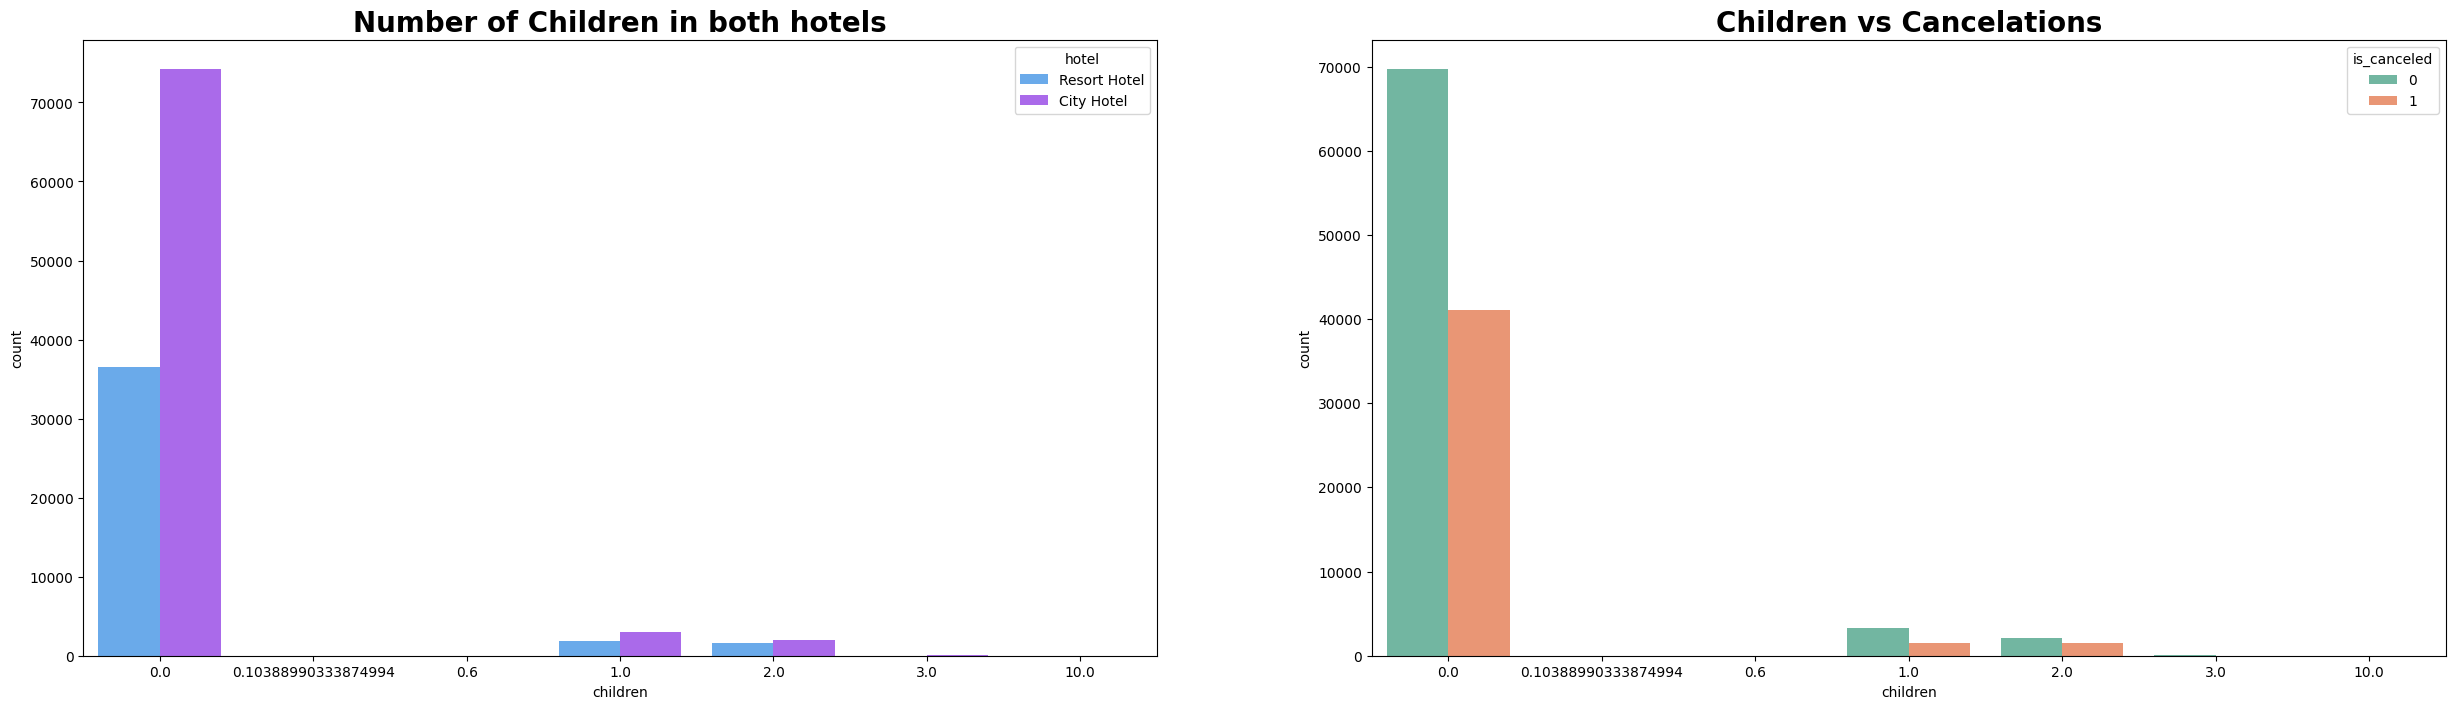

In [38]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='children',hue='hotel', data=df, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'children', hue='is_canceled', palette='Set2')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

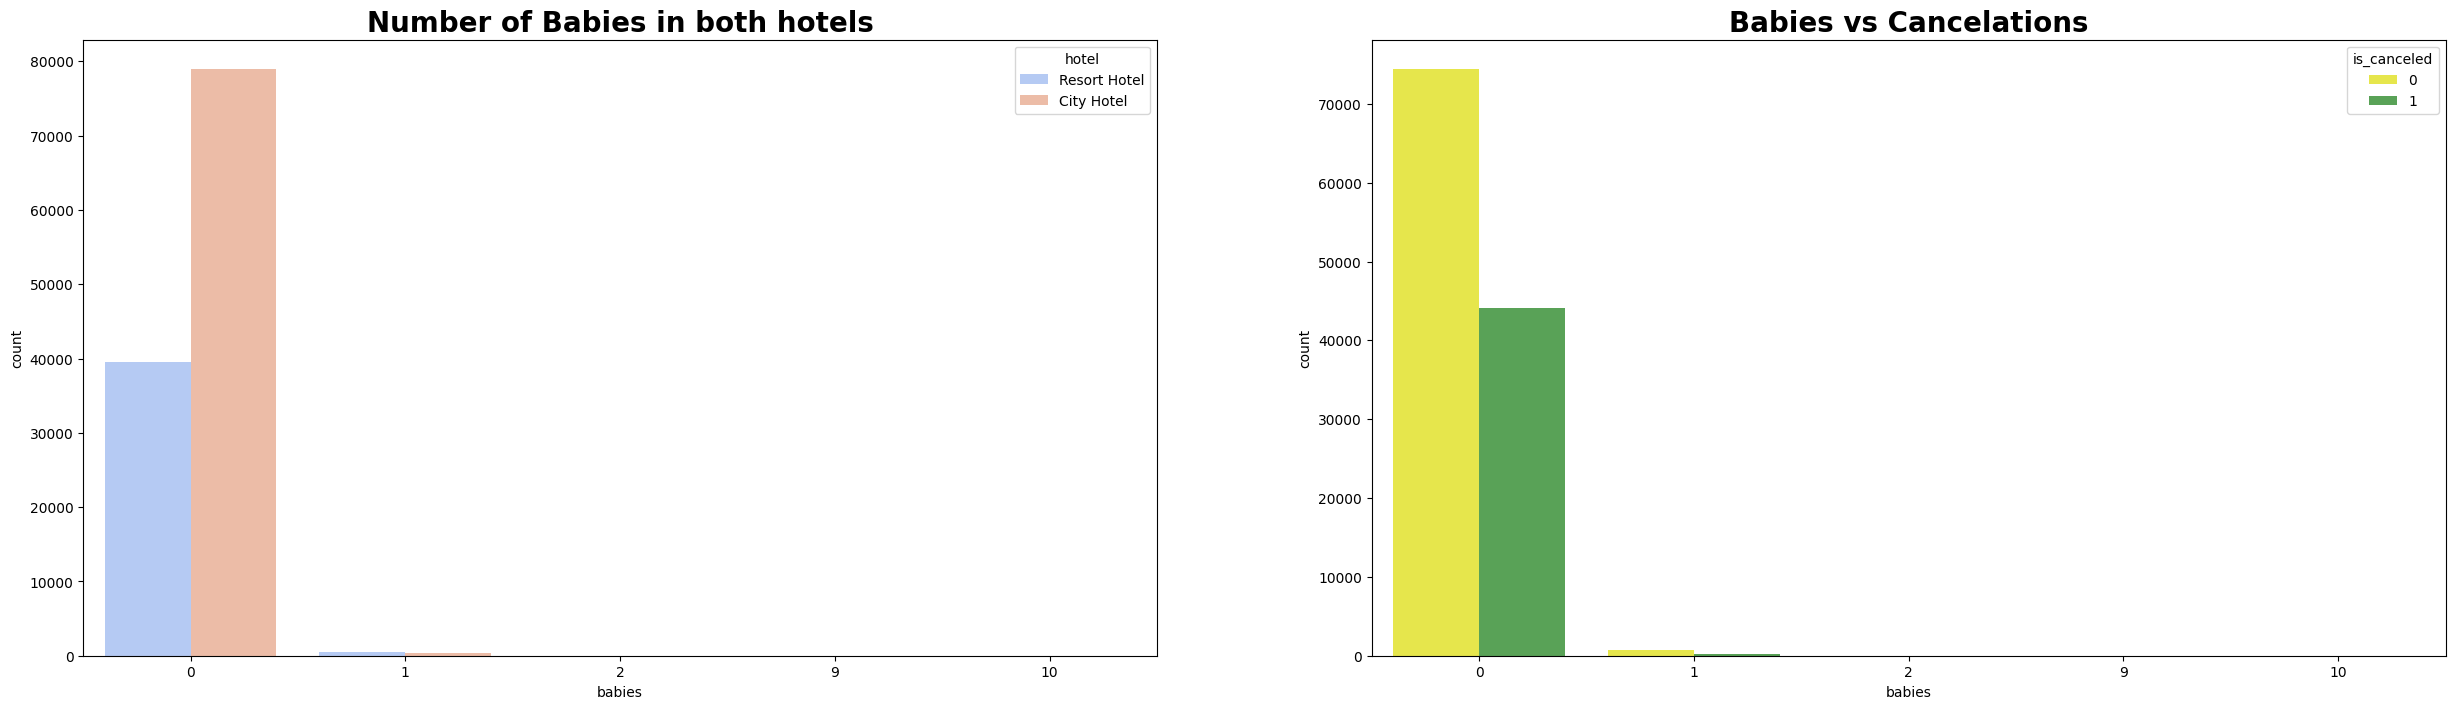

In [39]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='babies',hue='hotel', data=df, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'babies', hue='is_canceled', palette='Set1_r')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

Hầu hết du khách đến theo cặp mà không có trẻ em/trẻ sơ sinh và ưa thích khách sạn ở Thành phố hơn là khách sạn nghỉ dưỡng

du khách có 1 hoặc 2 con cũng thích khách sạn ở thành phố hơn

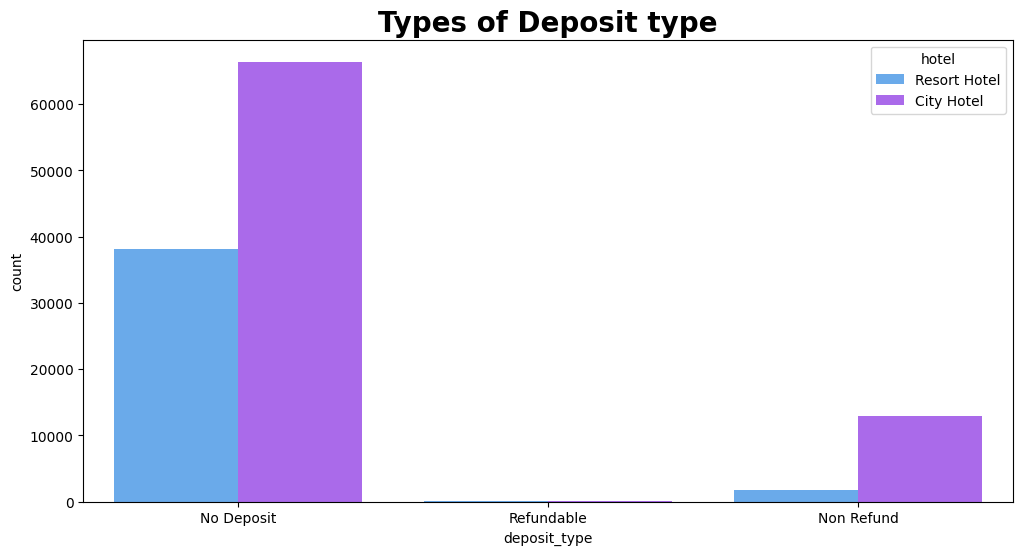

In [40]:
plt.figure(figsize=(12, 6))

sns.countplot(data = df, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

Không có khoản đặt cọc nào cho khách sạn Thành phố trong khi các Khu nghỉ dưỡng có một số khoản đặt cọc.

Không đặt cọc có thể dẫn đến việc hủy đặt phòng

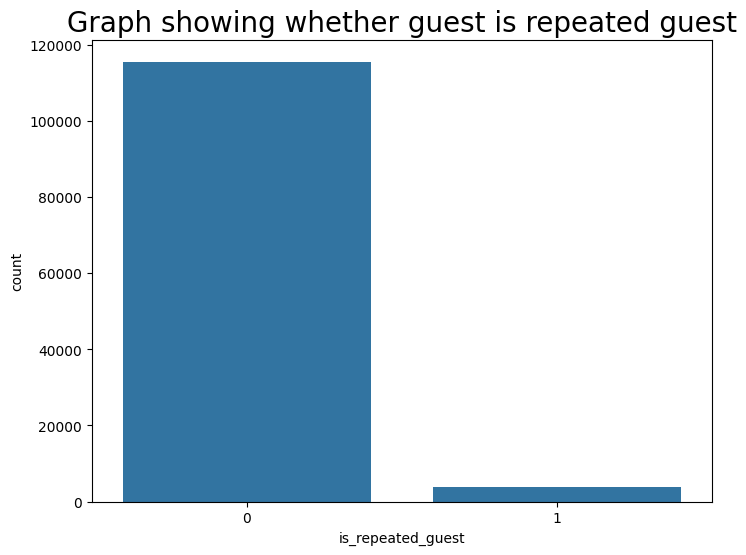

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

Số lượng khách quay lại thấp

Cần nhắm mục tiêu đến những khách thường xuyên vì họ đã đặt phòng trước đó.

DATA PREPOSESSING

Features like reservation_status, reservation_status_date and assigned_room_type are directly related to the target variable is_canceled, and including them in the model would result in data leakage. Removing these features is essential to build a predictive model that can genuinely forecast cancellations, rather than retrospectively label them:

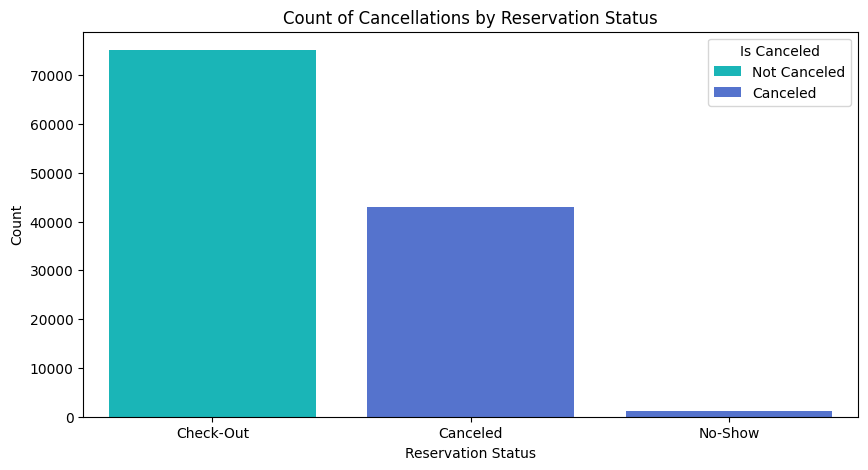

In [42]:
# Bivariate bar plot of 'is_canceled' vs 'reservation_status' with specified colors
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=df, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

In [43]:
df.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

It is clear from the plot that all the bookings with a reservation_status of "Canceled" or "No-Show" are indeed canceled (is_canceled= 1), and all the bookings with a reservation_status of "Check-Out" are not canceled (is_canceled = 0).

This confirms that the reservation_status feature is directly related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.



In [44]:
# Drop the `reservation_status` feature
df = df.drop(['reservation_status'], axis=1)

The reservation_status_date column is a date variable that represents the date of the last reservation status. Since it is a date, it will likely be in a 'YYYY-MM-DD' format. We can extract some useful information from it:

Days_Difference: Calculate the difference in days between the reservation_status_date and the arrival_date to create a new feature representing the number of days between the last reservation status and the arrival date.

In [45]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
df['reservation_status_days_difference'] = (df['reservation_status_date'] - pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))).dt.days



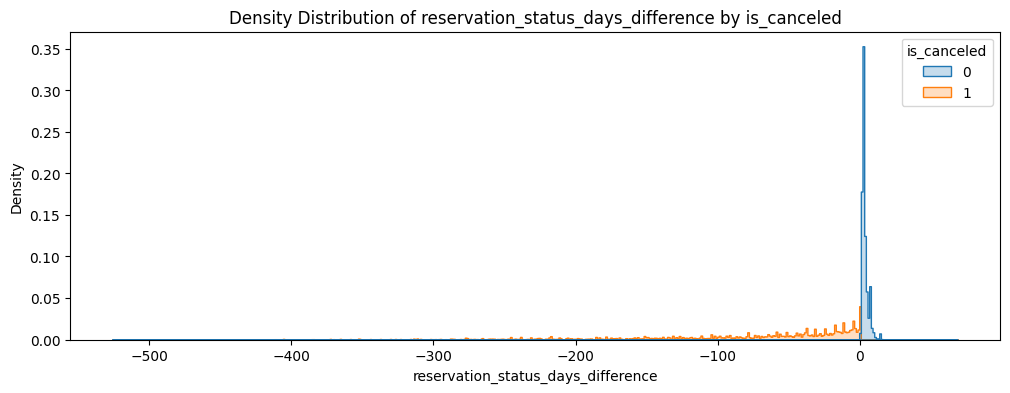

In [46]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [47]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(df[df['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(df[df['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

0    74460
Name: is_canceled, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

1    42137
Name: is_canceled, dtype: int64


The reservation_status_days_difference feature represents the number of days between the arrival date and the date at which the reservation status was last updated.

Positive values indicate that the reservation status was updated after the arrival date. Since is_canceled is always 0 for these rows, it suggests that these bookings were not canceled and the reservation status was updated (e.g., to 'Check-Out') after the guest arrived.
Negative values indicate that the reservation status was updated before the arrival date. Since is_canceled is always 1 for these rows, it suggests that these bookings were canceled before the arrival date.
This shows a clear relationship between the reservation_status_days_difference and the is_canceled feature. If a booking is canceled, the reservation status is usually updated before the arrival date. Conversely, if a booking is not canceled, the reservation status is usually updated after the arrival date.

Therefore, it is advisable to omit both the reservation_status_date and the reservation_status_days_difference features from the model. The latter was derived from the former, and both lead to data leakage, which could result in a model that does not generalize well to new data:

In [48]:
# Drop the 'reservation_status_date' and 'reservation_status_days_difference' columns
df = df.drop(['reservation_status_date', 'reservation_status_days_difference'], axis=1)

The assigned_room_type feature represents the type of room assigned to the guest. It is assigned after the booking is made, so it cannot be used to predict cancellations. Therefore, assigned_room_type is considered as an irrelevant feature and should be omitted:

In [49]:
df = df.drop(['assigned_room_type'], axis=1)

The arrival_date_year feature only includes a few years, and if we want to build a model that generalizes well to future data, it is advisable not to include features that could bias the model towards specific years. Therefore, it is reasonable to consider arrival_date_year as an irrelevant feature and it should be omitted.

In [50]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [51]:
# Drop the `arrival_date_year` feature
df = df.drop(['arrival_date_year'], axis=1)

In [52]:
# Create a dataframe with the number of unique categories and missing values for each high-cardinality feature
high_cardinality_features = ['country', 'agent', 'name', 'email', 'phone-number', 'credit_card']
unique_categories = df[high_cardinality_features].nunique()
missing_values = df[high_cardinality_features].isnull().sum()

# Combine the two series into a single dataframe
high_cardinality_df = pd.DataFrame({'Unique_Categories': unique_categories, 'Missing_Values': missing_values})

high_cardinality_df

,Unique_Categories,Missing_Values
country,177,0
agent,337,0
name,81503,0
email,115889,0
phone-number,119390,0
credit_card,9000,0


In [53]:
df = df.drop(['name', 'country', 'agent', 'email', 'phone-number', 'credit_card'], axis=1)

Handle Noisy Data

In [54]:
# Analyze noisy data
noisy_data = {
    'adr':      df[df['adr'] < 0],
    'adults':   df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies':   df[df['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 403, 'children': 1, 'babies': 1}

We have identified some noisy data in the following features:

adr: There is 1 booking with a negative Average Daily Rate (ADR), which doesn't make sense and indicates a potential error or special case.

adults: There are 403 bookings with 0 adults, which could be a data entry error unless there are legitimate cases where only children or babies book a room.

children: There is 1 booking with 10 children, which seems unusually high for a single booking and could be a potential outlier or data entry error.

babies: There is 1 booking with 10 babies, which seems unusually high for a single booking and could be a potential outlier or data entry error.

For each of these features, the best treatment would be:

adr: Since there is only one negative value, it would be reasonable to replace it with the median or mean of the adr column, as this will not significantly affect the distribution of the data.

adults: It is unlikely that a booking would be made with 0 adults, so these 403 rows seem to be errors. Given that this is a small proportion of the dataset, it would be reasonable to remove these rows.

children: Since there is only one booking with 10 children, it could be considered as an outlier and removed from the dataset.

babies: Similar to the children column, since there is only one booking with 10 babies, it could be considered as an outlier and removed from the dataset.

In [55]:
# Replace negative adr with median of adr column
df.loc[df['adr'] < 0, 'adr'] = df['adr'].median()

# Remove rows with 0 adults
df = df[df['adults'] != 0]

# Remove rows with 10 children or 10 babies
df = df[df['children'] != 10]
df = df[df['babies'] != 10]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'adr': df[df['adr'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

In [56]:
#encode

In [57]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   arrival_date_week_number        118985 non-null  int64  
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  is_repeated_guest               118985 non-null  int64  
 11  previous_cancellations          118985 non-null  int64  
 12  previous_booking

In [58]:
# Define the features (X) and the output labels (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
#scale independent feature

scaler = StandardScaler()
X = scaler.fit_transform(X)

MOdel

In this hotel booking problem, the target variable is is_canceled, which indicates whether a booking was canceled (1) or not (0). Both false positives (a booking is predicted as canceled, but it is not) and false negatives (a booking is predicted as not canceled, but it is) could be costly for the hotel.

However, false negatives may be more costly because the hotel might lose potential customers by overbooking rooms, expecting some cancellations that do not happen. Therefore, it is important to minimize false negatives, which means maximizing recall for the 'canceled' class (1) would be a good approach.

Precision is also important because it minimizes false positives, which means minimizing the cases where the model predicts a cancellation, but the guest actually arrives. This could lead to overbooking and unsatisfied customers.

Therefore, the F1-score, which is the harmonic mean of precision and recall, would be a good metric to use as it balances both precision and recall. Specifically, the F1-score for the 'canceled' class (1) would be the most important metric for evaluating models in this project.

I will create a function to identify the best set of hyperparameters that maximize the F1-score for class 1 (canceled bookings). This method provides a reusable framework for hyperparameter tuning for other models as well:

In [74]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7942177585409925
Confusion Matrix : 
[[13713  1157]
 [ 3740  5187]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14870
           1       0.82      0.58      0.68      8927

    accuracy                           0.79     23797
   macro avg       0.80      0.75      0.76     23797
weighted avg       0.80      0.79      0.79     23797



In [76]:
#Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.8270790435769214
Confusion Matrix : 
[[12814  2056]
 [ 2059  6868]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     14870
           1       0.77      0.77      0.77      8927

    accuracy                           0.83     23797
   macro avg       0.82      0.82      0.82     23797
weighted avg       0.83      0.83      0.83     23797



In [77]:
#Random Forest
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8657393789133084
Confusion Matrix : 
[[13825  1045]
 [ 2150  6777]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     14870
           1       0.87      0.76      0.81      8927

    accuracy                           0.87     23797
   macro avg       0.87      0.84      0.85     23797
weighted avg       0.87      0.87      0.86     23797



In [78]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8157750977013909
Confusion Matrix : 
[[13915   955]
 [ 3429  5498]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     14870
           1       0.85      0.62      0.71      8927

    accuracy                           0.82     23797
   macro avg       0.83      0.78      0.79     23797
weighted avg       0.82      0.82      0.81     23797



In [79]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7724923309660882
Confusion Matrix : 
[[12759  2111]
 [ 3303  5624]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     14870
           1       0.73      0.63      0.68      8927

    accuracy                           0.77     23797
   macro avg       0.76      0.74      0.75     23797
weighted avg       0.77      0.77      0.77     23797



In [85]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf,  acc_gb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.865739
2,Decision Tree Classifier,0.827079
4,Gradient Boosting Classifier,0.815775
0,Logistic Regression,0.794218
1,KNN,0.772492


In [86]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')